<a href="https://colab.research.google.com/github/IsraelAbebe/Personal-Projects-and-Exercises/blob/master/AIMS-Assignments/NLP/Language_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io, sys, math, re
from collections import defaultdict
import numpy as np

In [0]:
def load_data(filename):
    '''
    Parameters:
    filename (string): path to file to be read
    
    Return: 
    List of tuples (explained in first question)
    '''
    fin = io.open(filename, 'r', encoding='utf-8')
    data = []
    for line in fin:
        tokens = line.split()
        data.append((tokens[0], tokens[1:]))
    return data

In [23]:
data = load_data("train1.txt")
data[1]

('__label__deu', ['Tom', 'ist', 'an', 'Kunst', 'völlig', 'uninteressiert.'])

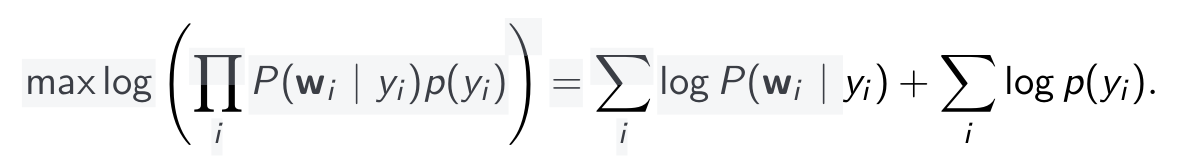






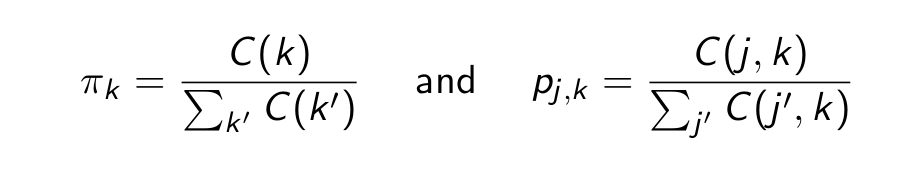

In [0]:
def count_words(data):
    '''
    Parameters:
    
    data is  list of [(label, words), (label, worlds), ......]
    list of tuples in the shape (string, [list of strings]) )
    
    Returns: 
    
    This function should return a dictionary containing the following:
    { 
    # label_counts (python dictionary): 
         {label:  no. of times the label appeared },
    # word_counts  (dictionary of dictionaries): 
         {label: {word: no. of times this word appeared with this label }},
    # label_total (int): 
        total number of labels. (size of train data),
    # word_total  (python dictionary) total number of words (from the entire corupus) of the particular label:
          {label: no.of words}
          
          }
    
    '''
    label_total = 0
    word_total = defaultdict(lambda: 0)
    label_counts = defaultdict(lambda: 0)
    word_counts = defaultdict(lambda: defaultdict(lambda: 0.0))
    
    for example in data:
        label, sentence = example
        #LABEL_COUNTS
        label_counts[label] += 1.0
           
        #word_counts
        for word in sentence:
            word_counts[label][word] += 1.0
            word_total[label] += 1.0
            
    #LABEL_TOTAL
    label_total = len(label_counts.keys())

    return {'label_counts': label_counts, 
            'word_counts': word_counts, 
            'label_total': label_total, 
            'word_total': word_total}

In [32]:
label_counts= count_words(data)['label_counts']
word_counts= count_words(data)['word_counts']
label_total= count_words(data)['label_total']
word_total= count_words(data)['word_total']

word_counts['__label__deu']['Ich']

140.0

In [0]:
import operator
def predict(sentence, mu, label_counts, word_counts, label_total, word_total):
    '''
     Parameters: 
        sentence (string): sentence to be classified
        mu (positive real number): Laplace Smoothing hyperparameter
        ** The other parameters introduced in the count_words function
    
    Returns:
    best_label (string): the label that has the highest score. 
    
    Implement the function to predict the best label for the given sentence using Naive Bayes algorithm 
    
    '''
    best_label = None
    best_score = float('-inf')

    label_outputs = defaultdict(lambda: 0)
    for label in word_counts.keys():
        score = 0.0
        
        sentence_count = len(word_counts[label].values())
            
        prod = 0
        for i in sentence:
            prod += np.log((word_counts[label][i]+mu)/(sentence_count+(mu*word_total[label])))
            
        lebel_prob = np.log(label_counts[label]/sum(list(label_counts.values())))
            
        
        label_outputs[label] = prod +  lebel_prob
        
            
    best_score = max(list(label_outputs.values()))
    sorted_x = sorted(label_outputs.items(), key=operator.itemgetter(1))
    best_label = sorted_x[-1][0]
    
    

    return best_label


In [65]:
for example in range(len(data)):
        label, sentence = data[example]
        print(' '.join(sentence),predict(sentence, 3, label_counts, word_counts, label_total, word_total))
        if example == 10:
            break
        

Ich würde alles tun, um dich zu beschützen. __label__deu
Tom ist an Kunst völlig uninteressiert. __label__deu
Végeztem Tomival. __label__eng
„Wird das in der Werkstatt gemacht?“ – „Nein, das muss an Ort und Stelle erledigt werden.“ __label__deu
У меня есть яблоко. __label__rus
Non possiamo lasciarle lì. __label__ita
Том считает, что школа — это пустая трата времени. __label__rus
My fathers don't speak Dutch. __label__eng
El niño no sabe cómo comportarse. __label__spa
Она думала, что он переночует у неё. __label__rus
Helikopter neden kentin üstünde uçuyor? __label__tur


In [0]:
def compute_accuracy(valid_data, mu, counts):
    '''
    Parameters:
    valid_data (list of tuples): returned value of load_data function 
    mu (positive real): Laplace smoothing hyper-parameter
    counts (dictionary of dictionaries): return value of count_words_function
    
    Returns: 
    accuracy (float): the accuracy of the Naive Bayes classifier
    '''
    accuracy = 0.0
    for label, sentence in valid_data:
        predicted_label = predict(sentence, mu, label_counts, word_counts, label_total, word_total)
        if predicted_label==label:
            accuracy += 1.0
         

    return accuracy/len(valid_data)

In [67]:
print("")
print("** Naive Bayes **")
print("")

mu = 2.0
train_data = load_data("train1.txt")
valid_data = load_data("valid1.txt")
counts = count_words(train_data)

print("Training accuracy: %.3f" % compute_accuracy(train_data, mu, counts))
print("")


** Naive Bayes **

Training accuracy: 0.975



In [68]:
print("")
print("** Naive Bayes **")
print("")

mu = 3.0
train_data = load_data("train1.txt")
valid_data = load_data("valid1.txt")
counts = count_words(valid_data)

print("Validation accuracy: %.3f" % compute_accuracy(valid_data, mu, counts))
print("")


** Naive Bayes **

Validation accuracy: 0.918

